### Reading and Understanding the Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
df_main = pd.read_csv('car data.csv')

In [3]:
df_main.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_main.shape

(301, 9)

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#missing values
df_main.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df_main['Age'] = 2023 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)

In [9]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA)

In [10]:
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

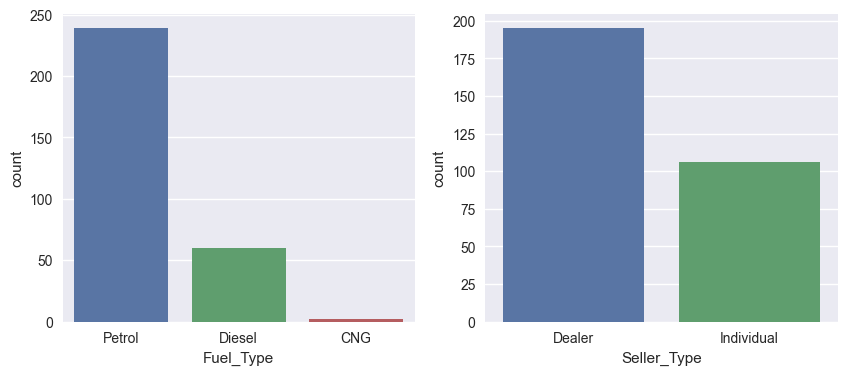

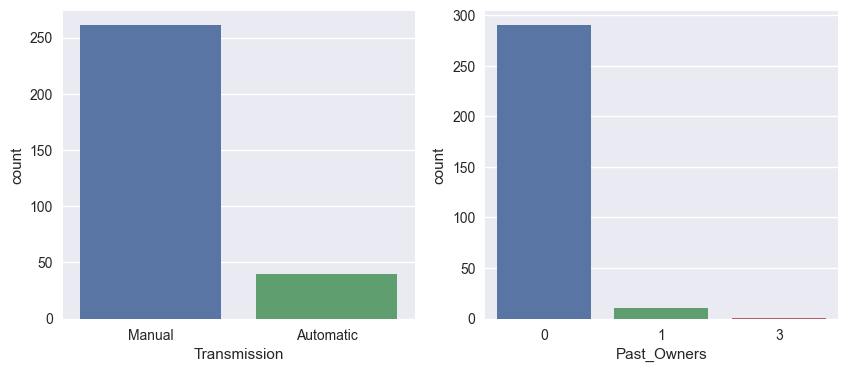

In [11]:
category = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=category[i], data=df_main)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=category[i], data=df_main)
    i += 1
    
    plt.show()

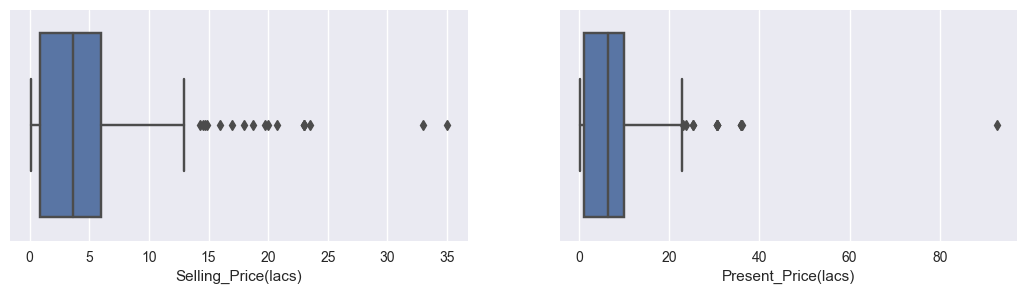

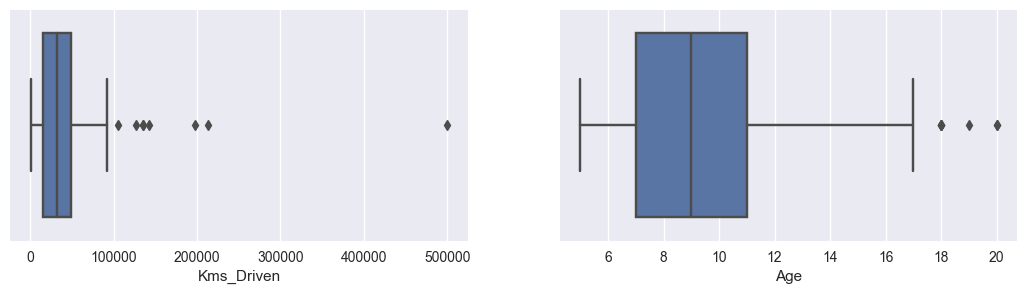

In [12]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()

In [13]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [14]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


#### Creating Dummies for Categorical Features

In [15]:
df_main.drop(labels='Car_Name',axis= 1, inplace = True)

In [16]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

In [18]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


### Train-Test Split

In [19]:
# Separating target variable and its features
y = df_main['Selling_Price(lacs)']
X = df_main.drop('Selling_Price(lacs)',axis=1)

print(X)

     Present_Price(lacs)  Kms_Driven  Past_Owners  Age  Fuel_Type_Diesel  \
0                  5.590       27000            0    9             False   
1                  9.540       43000            0   10              True   
2                  9.850        6900            0    6             False   
3                  4.150        5200            0   12             False   
4                  6.870       42450            0    9              True   
5                  9.830        2071            0    5              True   
6                  8.120       18796            0    8             False   
7                  8.610       33429            0    8              True   
8                  8.890       20273            0    7              True   
9                  8.920       42367            0    8              True   
10                 3.600        2135            0    6             False   
11                10.380       51000            0    8              True   
12          

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


#### Applying regression models
1. Linear Regression 
2. Random Forest Regression

In [22]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#### Standard Linear Regression or Ordinary Least Squares

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
R2_train_lr = r2_score(y_train, y_pred_train_lr)
R2_test_lr = r2_score(y_test, y_pred_test_lr)
cross_val_lr = cross_val_score(lr, X_train, y_train, cv=5)
cv_mean_lr = cross_val_lr.mean()
LR_results = {
    'Train R2-score': round(R2_train_lr, 2),
    'Test R2-score': round(R2_test_lr, 2),
    'Train CV scores': cross_val_lr,
    'Train CV mean': round(cv_mean_lr, 2)
}
pickle.dump(lr, open('Linear_regressor.pkl', 'wb'))

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

# Hyperparameters for Random Forest
n_estimators = list(range(500, 1000, 100))
max_depth = list(range(4, 9, 4))
min_samples_split = list(range(4, 9, 2))
min_samples_leaf = [1, 2, 5, 7]
max_features = ['auto', 'sqrt']

# Hyperparameters dictionary
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

rf_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid)
rf_rs.fit(X_train, y_train)
y_pred_train_rf = rf_rs.predict(X_train)
y_pred_test_rf = rf_rs.predict(X_test)
R2_train_rf = r2_score(y_train, y_pred_train_rf)
R2_test_rf = r2_score(y_test, y_pred_test_rf)
cross_val_rf = cross_val_score(rf_rs, X_train, y_train, cv=5)
cv_mean_rf = cross_val_rf.mean()
RF_results = {
    'Train R2-score': round(R2_train_rf, 2),
    'Test R2-score': round(R2_test_rf, 2),
    'Train CV scores': cross_val_rf,
    'Train CV mean': round(cv_mean_rf, 2)
}
pickle.dump(rf_rs, open('random_forest.pkl', 'wb'))

In [25]:
print("Linear Regression Results:")
for key, value in LR_results.items():
    print(key + ":", value)

print("\nRandom Forest Results:")
for key, value in RF_results.items():
    print(key + ":", value)

Linear Regression Results:
Train R2-score: 0.88
Test R2-score: 0.86
Train CV scores: [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean: 0.84

Random Forest Results:
Train R2-score: 0.98
Test R2-score: 0.87
Train CV scores: [0.86468721 0.96479289 0.84942246 0.92898913 0.73551538]
Train CV mean: 0.87


In [26]:
best_model = rf
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Predictions:")
print(y_pred)


Predictions:
[ 6.494   2.9235  0.4891  2.965   1.0758  5.101   0.8208  3.1095  8.858
  0.5858  8.4719  3.719   5.3615  4.128   0.1762  0.4299  7.3515  5.3675
  5.133   7.319   4.886   3.633   8.7275  7.2782 11.7925  3.2345  3.1584
  0.6318  0.2507  0.4517  0.2825  0.2272  5.2585 24.3615 21.639   4.0795
  3.179   0.9345  0.2816  3.87    9.4636 10.7823  0.3085  4.3575  4.426
  4.442   6.1525  7.5985  7.593   1.1523  4.7435  0.46    2.8545  4.281
  1.1559  0.141  22.1015  0.5768  5.942   5.9965  0.2598]
